# Importing Libraries

In [528]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from xgboost import XGBClassifier, XGBRegressor
import xgboost as xgb
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
    AdaBoostClassifier,
    AdaBoostRegressor
)
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    root_mean_squared_error,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    classification_report
)

In [474]:
df = pd.read_csv("adult_income.csv")

# Seeing Dataset

In [475]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [476]:
df.shape

(32561, 15)

In [477]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [478]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  str  
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  str  
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  str  
 6   occupation      32561 non-null  str  
 7   relationship    32561 non-null  str  
 8   race            32561 non-null  str  
 9   sex             32561 non-null  str  
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  str  
 14  income          32561 non-null  str  
dtypes: int64(6), str(9)
memory usage: 3.7 MB


In [479]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [480]:
df.duplicated().sum()

np.int64(24)

In [481]:
df.shape

(32561, 15)

In [482]:
df.value_counts()

age  workclass  fnlwgt  education     education.num  marital.status      occupation         relationship   race                sex     capital.gain  capital.loss  hours.per.week  native.country  income
25   Private    195994  1st-4th       2              Never-married       Priv-house-serv    Not-in-family  White               Female  0             0             40              Guatemala       <=50K     3
90   Private    52386   Some-college  10             Never-married       Other-service      Not-in-family  Asian-Pac-Islander  Male    0             0             35              United-States   <=50K     2
19   Private    251579  Some-college  10             Never-married       Other-service      Own-child      White               Male    0             0             14              United-States   <=50K     2
25   Private    308144  Bachelors     13             Never-married       Craft-repair       Not-in-family  White               Male    0             0             40            

In [483]:
df.dtypes

age               int64
workclass           str
fnlwgt            int64
education           str
education.num     int64
marital.status      str
occupation          str
relationship        str
race                str
sex                 str
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country      str
income              str
dtype: object

In [484]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='str')

In [485]:
df.select_dtypes('int64')

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [486]:
df.select_dtypes('str')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


# Making Functions

In [487]:
def detect_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

# Data Cleaning

In [488]:
df.drop_duplicates(inplace=True)

In [489]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='str')

In [490]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace("-", "_")
    .str.replace(" ", "_")
    .str.replace(".", "_")
)

In [491]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='str')

In [492]:
df = df.replace("?",np.nan)

In [493]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [494]:
for col in df.select_dtypes(include="str").columns:
    df[col] = df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6272\1937375354.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col] = df[col].fillna(df[col].mode()[0], inplace=True)


In [495]:
df['income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32537, dtype: str

In [496]:
df["income"] = df["income"].str.strip()

In [497]:
df['income'].value_counts()

income
<=50K    24698
>50K      7839
Name: count, dtype: int64

In [498]:
df['income'] = df['income'].map({
    "<=50K" : 0,
    ">50K" : 1
})

In [499]:
df['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32537, dtype: int64

In [500]:
df.drop(columns=["fnlwgt", "education"], inplace=True)

In [501]:
df

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [502]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

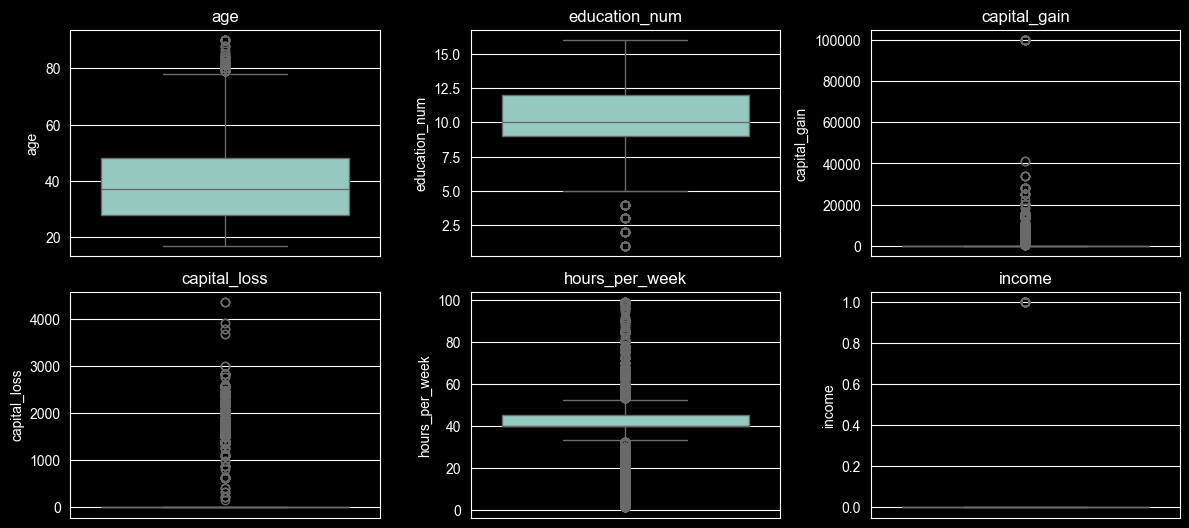

In [503]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [504]:
df.drop_duplicates(inplace=True)

In [505]:
df.duplicated().sum()

np.int64(0)

In [506]:
df["capital_gain"] = np.log1p(df["capital_gain"])
df["capital_loss"] = np.log1p(df["capital_loss"])

In [507]:
df

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0.0,8.379539,40,United-States,0
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,8.379539,18,United-States,0
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0.0,8.379539,40,United-States,0
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,8.268988,40,United-States,0
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0.0,8.268988,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0.0,0.000000,11,Taiwan,0
32555,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.000000,40,United-States,1
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.000000,40,United-States,0
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.000000,38,United-States,0


In [518]:
X = df.drop("income", axis=1)
y = df["income"]

In [519]:
num_cols = X.select_dtypes('int64').columns
cat_cols = X.select_dtypes("str").columns

In [520]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# Classification Model Comparison

In [521]:
X_clean = preprocessor.fit_transform(X)

In [522]:
x_train, x_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

In [526]:
models = {
    "Logistic Regression" : LogisticRegression,
    "Decision Tree Classifier" : DecisionTreeClassifier,
    "Random Forest Classifier" : RandomForestClassifier,
    "XGBoost Classifier" : XGBClassifier,
    "ADABoost" : AdaBoostClassifier,
    "GradiantBoost" : GradientBoostingClassifier
}

Logistic Regression :- 
	Train Score:- 82.72%
	Test Score :- 82.41%
	Accuracy Score :- 82.41%
	Precision Score :- 66.96%
	Recall Score = 53.82%
	F1 Score = 59.68%
	Confusion Matrix:- [[4021  372]
 [ 647  754]]
Classification Report on Logistic Regression :- 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4393
           1       0.67      0.54      0.60      1401

    accuracy                           0.82      5794
   macro avg       0.77      0.73      0.74      5794
weighted avg       0.82      0.82      0.82      5794



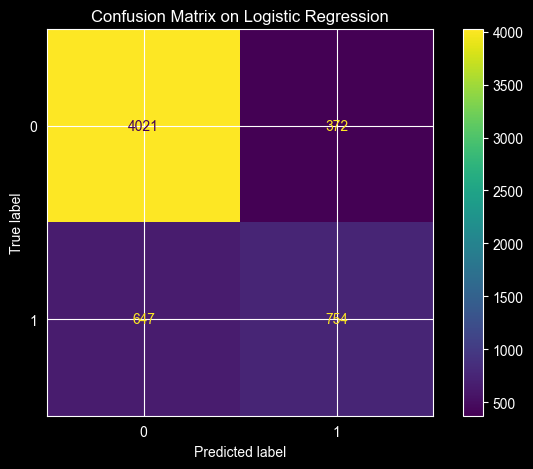

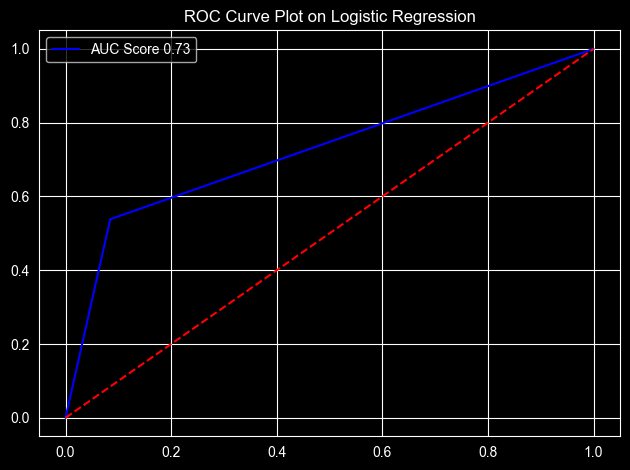

----------------------------------------------------------------------------------------------------
Decision Tree Classifier :- 
	Train Score:- 97.42%
	Test Score :- 75.63%
	Accuracy Score :- 75.63%
	Precision Score :- 49.60%
	Recall Score = 49.25%
	F1 Score = 49.43%
	Confusion Matrix:- [[3692  701]
 [ 711  690]]
Classification Report on Decision Tree Classifier :- 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4393
           1       0.50      0.49      0.49      1401

    accuracy                           0.76      5794
   macro avg       0.67      0.67      0.67      5794
weighted avg       0.76      0.76      0.76      5794



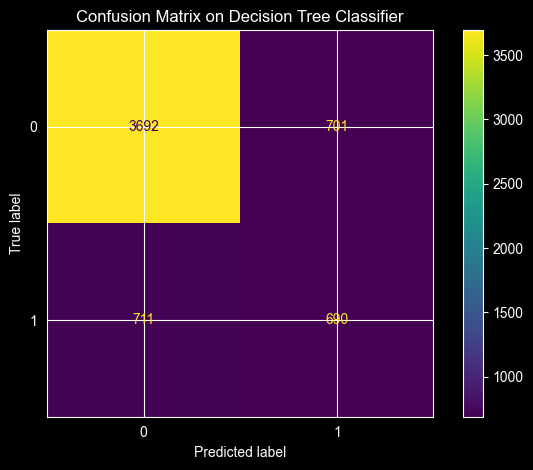

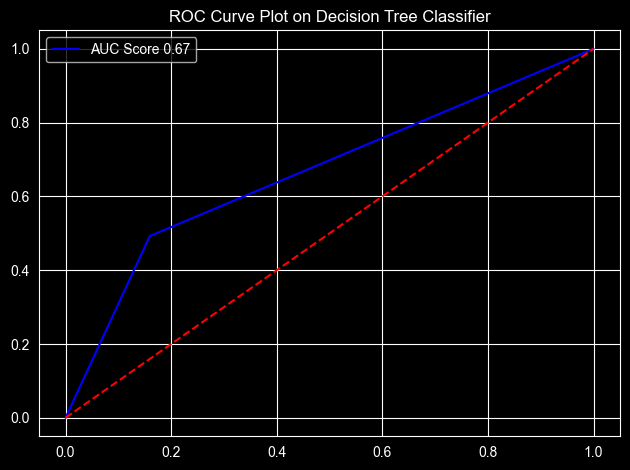

----------------------------------------------------------------------------------------------------
Random Forest Classifier :- 
	Train Score:- 97.42%
	Test Score :- 80.03%
	Accuracy Score :- 80.03%
	Precision Score :- 60.07%
	Recall Score = 51.96%
	F1 Score = 55.72%
	Confusion Matrix:- [[3909  484]
 [ 673  728]]
Classification Report on Random Forest Classifier :- 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4393
           1       0.60      0.52      0.56      1401

    accuracy                           0.80      5794
   macro avg       0.73      0.70      0.71      5794
weighted avg       0.79      0.80      0.80      5794



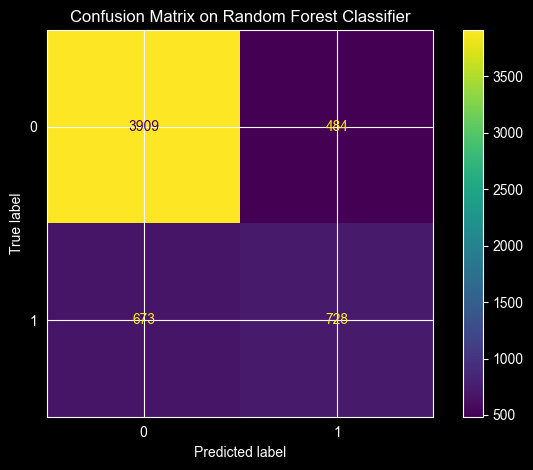

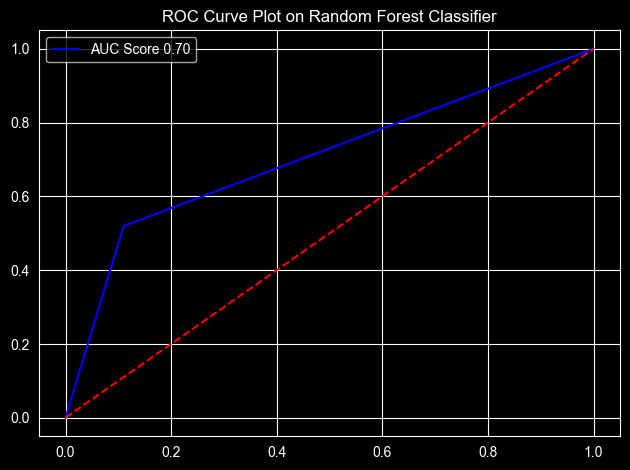

----------------------------------------------------------------------------------------------------
XGBoost Classifier :- 
	Train Score:- 86.98%
	Test Score :- 82.90%
	Accuracy Score :- 82.90%
	Precision Score :- 66.27%
	Recall Score = 59.60%
	F1 Score = 62.76%
	Confusion Matrix:- [[3968  425]
 [ 566  835]]
Classification Report on XGBoost Classifier :- 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4393
           1       0.66      0.60      0.63      1401

    accuracy                           0.83      5794
   macro avg       0.77      0.75      0.76      5794
weighted avg       0.82      0.83      0.83      5794



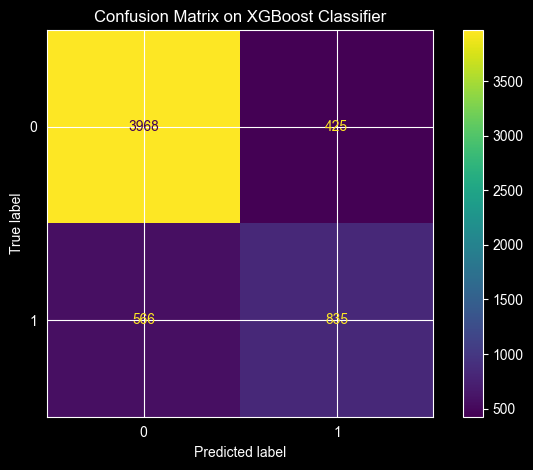

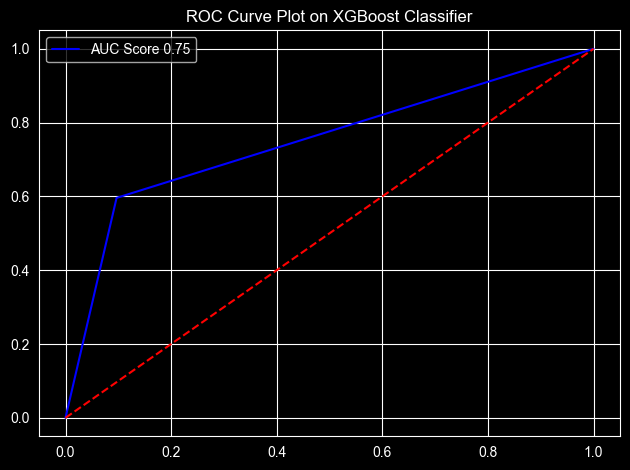

----------------------------------------------------------------------------------------------------
ADABoost :- 
	Train Score:- 82.11%
	Test Score :- 81.84%
	Accuracy Score :- 81.84%
	Precision Score :- 67.82%
	Recall Score = 47.39%
	F1 Score = 55.80%
	Confusion Matrix:- [[4078  315]
 [ 737  664]]
Classification Report on ADABoost :- 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4393
           1       0.68      0.47      0.56      1401

    accuracy                           0.82      5794
   macro avg       0.76      0.70      0.72      5794
weighted avg       0.81      0.82      0.81      5794



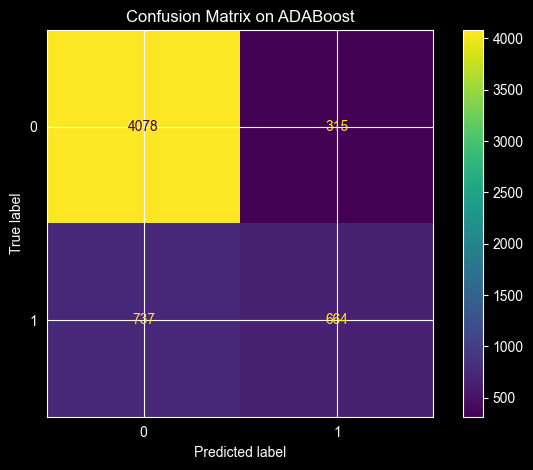

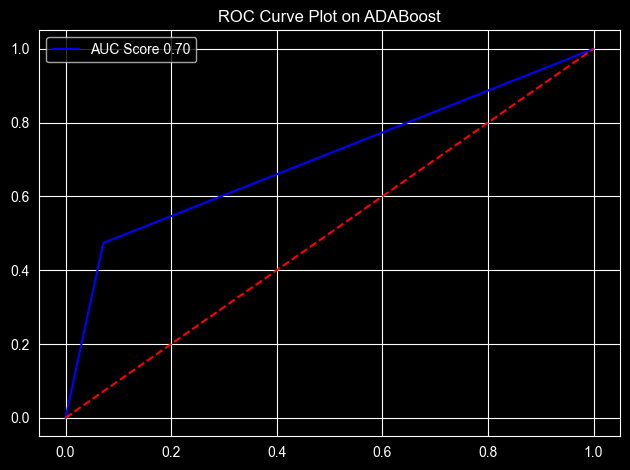

----------------------------------------------------------------------------------------------------
GradiantBoost :- 
	Train Score:- 83.94%
	Test Score :- 82.72%
	Accuracy Score :- 82.72%
	Precision Score :- 67.51%
	Recall Score = 55.03%
	F1 Score = 60.64%
	Confusion Matrix:- [[4022  371]
 [ 630  771]]
Classification Report on GradiantBoost :- 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4393
           1       0.68      0.55      0.61      1401

    accuracy                           0.83      5794
   macro avg       0.77      0.73      0.75      5794
weighted avg       0.82      0.83      0.82      5794



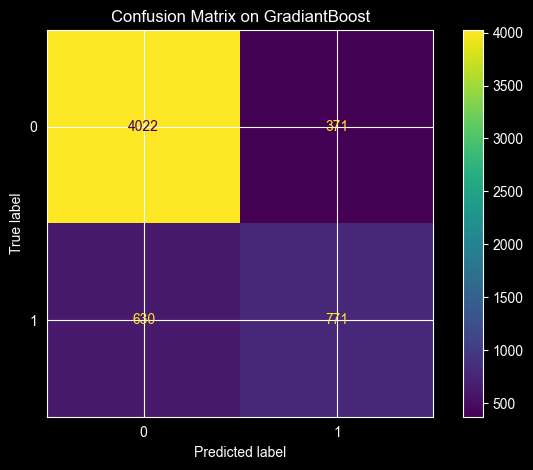

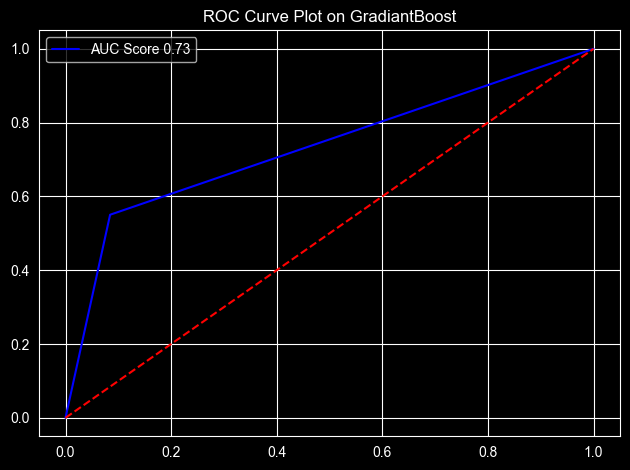

----------------------------------------------------------------------------------------------------


In [529]:
result_list = []
score_list = []

for name, model_class in models.items():
    model = model_class()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision_score_val = precision_score(y_test, y_pred)
    recall_score_val = recall_score(y_test, y_pred)
    f1_score_val = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"{name} :- ")
    print(f"\tTrain Score:- {train_score*100:.2f}%")
    print(f"\tTest Score :- {test_score*100:.2f}%")
    print(f"\tAccuracy Score :- {accuracy*100:.2f}%")
    print(f"\tPrecision Score :- {precision_score_val*100:.2f}%")
    print(f"\tRecall Score = {recall_score_val*100:.2f}%")
    print(f"\tF1 Score = {f1_score_val*100:.2f}%")
    print(f"\tConfusion Matrix:- {cm}")

    print(f"Classification Report on {name} :- \n{classification_report(y_test, y_pred)}")


    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.title(f"Confusion Matrix on {name}")
    plt.tight_layout()
    plt.show()

    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label=f"AUC Score {auc_score:.2f}",color='blue')
    plt.plot([0,1],[0,1],color='red',linestyle='--')
    plt.title(f"ROC Curve Plot on {name}")
    plt.tight_layout()
    plt.legend()
    plt.show()

    print("-" * 100)

    result_list.append({
        "Model": name,
        "Train_Score": train_score,
        "Test_Score": test_score,
        "Accuracy": accuracy,
        "Precision": precision_score_val,
        "Recall": recall_score_val,
        "F1_Score": f1_score_val,
        "Confusion_Matrix": cm,
        "AUC_Score" : auc_score
    })

    score_list.append({
        "Model": name,
        "Train_Score": train_score,
        "Test_Score": test_score
    })

df_result = pd.DataFrame(result_list)
df_score = pd.DataFrame(score_list)

In [530]:
df_result

,Model,Train_Score,Test_Score,Accuracy,Precision,Recall,F1_Score,Confusion_Matrix,AUC_Score
0,Logistic Regression,0.827192,0.824128,0.824128,0.669627,0.538187,0.596755,"[[4021, 372], [647, 754]]",0.726753
1,Decision Tree Classifier,0.974241,0.756300,0.756300,0.496046,0.492505,0.494269,"[[3692, 701], [711, 690]]",0.666467
2,Random Forest Classifier,0.974241,0.800311,0.800311,0.600660,0.519629,0.557214,"[[3909, 484], [673, 728]]",0.704727
3,XGBoost Classifier,0.869779,0.828961,0.828961,0.662698,0.596003,0.627584,"[[3968, 425], [566, 835]]",0.749629
4,ADABoost,0.821108,0.818433,0.818433,0.678243,0.473947,0.557983,"[[4078, 315], [737, 664]]",0.701121
5,GradiantBoost,0.839360,0.827235,0.827235,0.675131,0.550321,0.606370,"[[4022, 371], [630, 771]]",0.732934


In [531]:
df_score

,Model,Train_Score,Test_Score
0,Logistic Regression,0.827192,0.824128
1,Decision Tree Classifier,0.974241,0.756300
2,Random Forest Classifier,0.974241,0.800311
3,XGBoost Classifier,0.869779,0.828961
4,ADABoost,0.821108,0.818433
5,GradiantBoost,0.839360,0.827235


# Regression Model Comparison